In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("spotify.csv")
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [4]:
spotify_data_dummies = pd.get_dummies(df, columns=['track_genre'])

print(spotify_data_dummies.columns)

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       ...
       'track_genre_spanish', 'track_genre_study', 'track_genre_swedish',
       'track_genre_synth-pop', 'track_genre_tango', 'track_genre_techno',
       'track_genre_trance', 'track_genre_trip-hop', 'track_genre_turkish',
       'track_genre_world-music'],
      dtype='object', length=134)


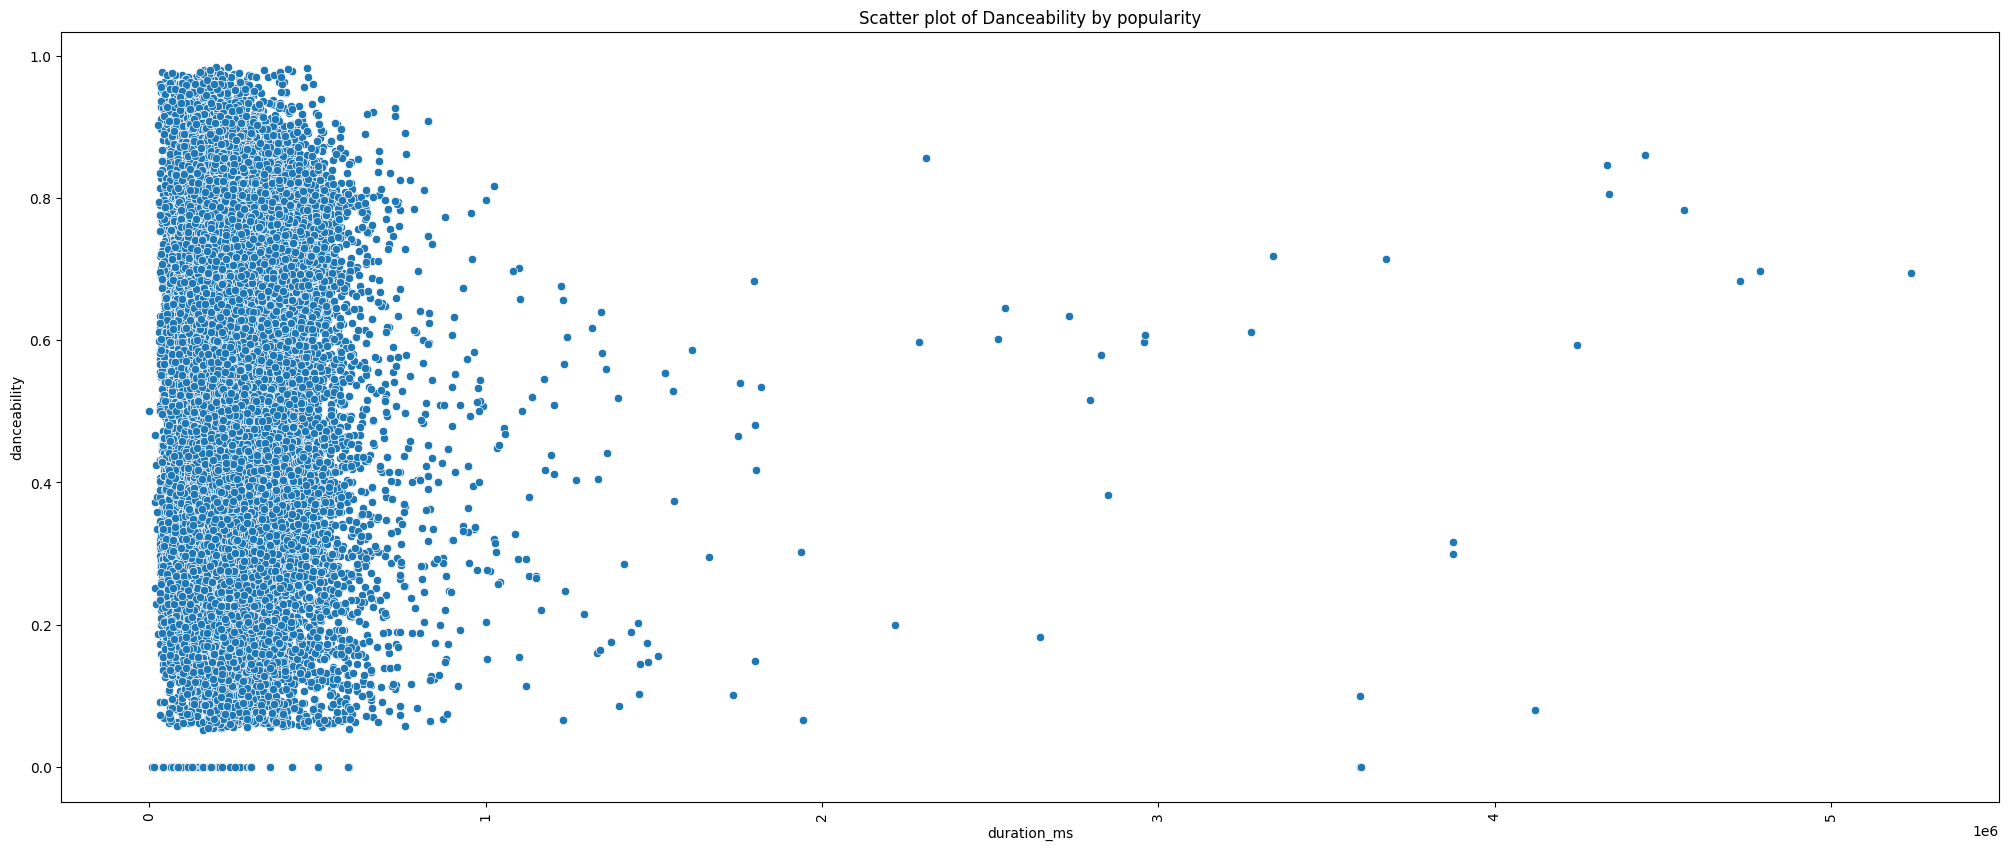

In [5]:
plt.figure(figsize=(25, 10))
sns.scatterplot(x='duration_ms', y='danceability', data=df)
plt.xlabel('duration_ms')
plt.ylabel('danceability')
plt.title('Scatter plot of Danceability by popularity')
plt.xticks(rotation=90)
plt.show()

In [6]:
unique_genres = df['track_genre'].unique()
unique_genres = df['track_genre'].drop_duplicates()
unique_genres = set(df['track_genre'])
unique_genres = list(unique_genres)

genre_counts = df['track_genre'].value_counts()
print(genre_counts)

track_genre
acoustic             1000
punk-rock            1000
progressive-house    1000
power-pop            1000
pop                  1000
                     ... 
folk                 1000
emo                  1000
electronic           1000
electro              1000
world-music          1000
Name: count, Length: 114, dtype: int64


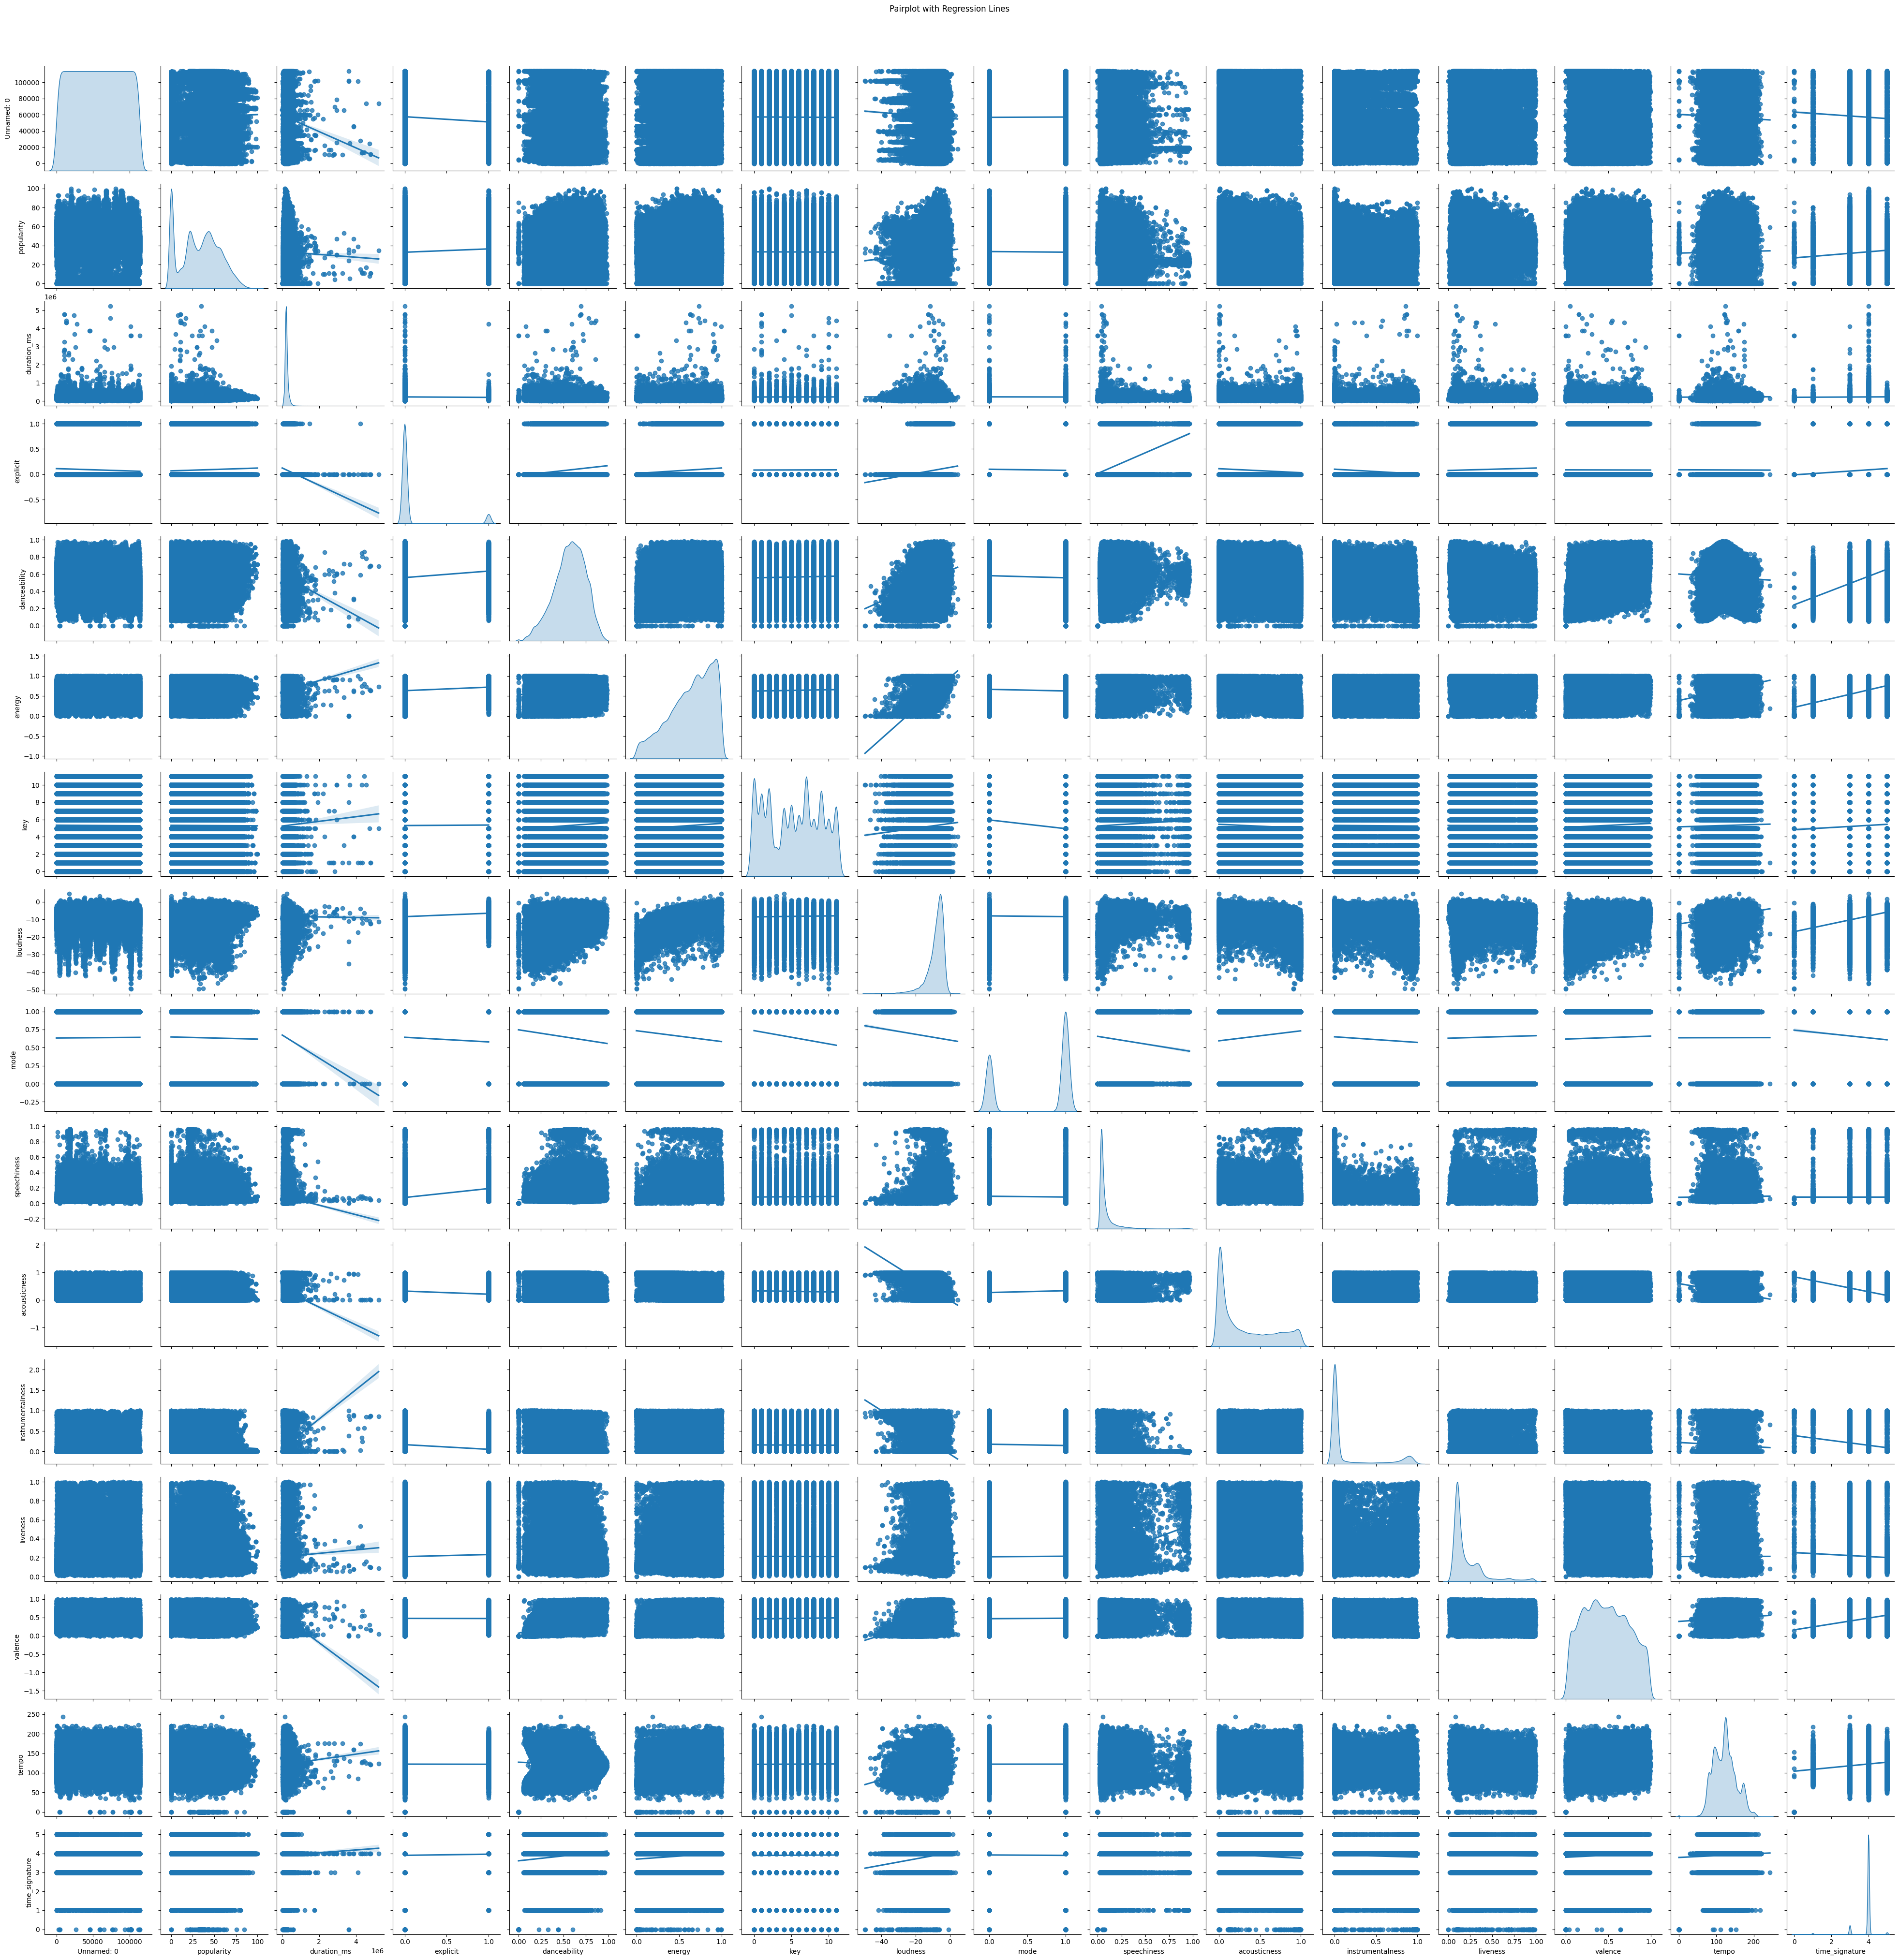

In [7]:
sns.pairplot(df, kind='reg', diag_kind='kde')
plt.suptitle('Pairplot with Regression Lines', y=1.02)  
plt.show()

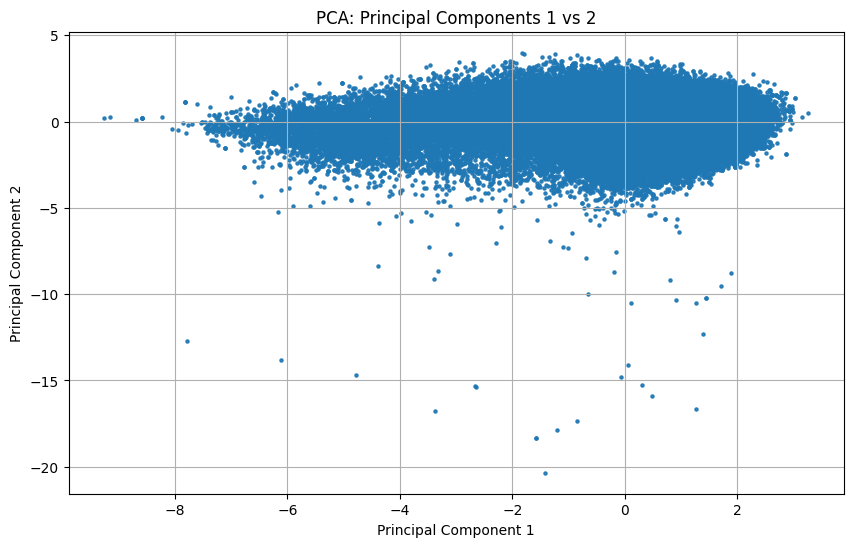

In [8]:


numeric_columns = ['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness',
                   'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_columns])

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

plt.figure(figsize=(10, 6))
plt.scatter(pc_df['PC1'], pc_df['PC2'], s=5, alpha=0.9)
plt.title('PCA: Principal Components 1 vs 2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

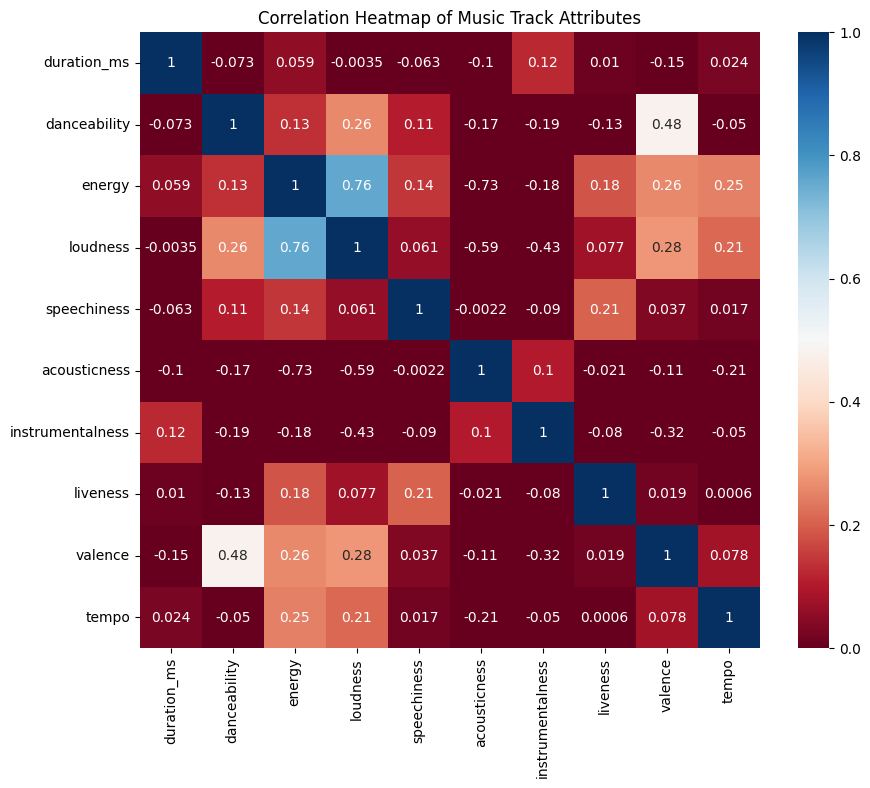

In [9]:
corr_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', vmin=0, vmax=1)
plt.title('Correlation Heatmap of Music Track Attributes')
plt.show()


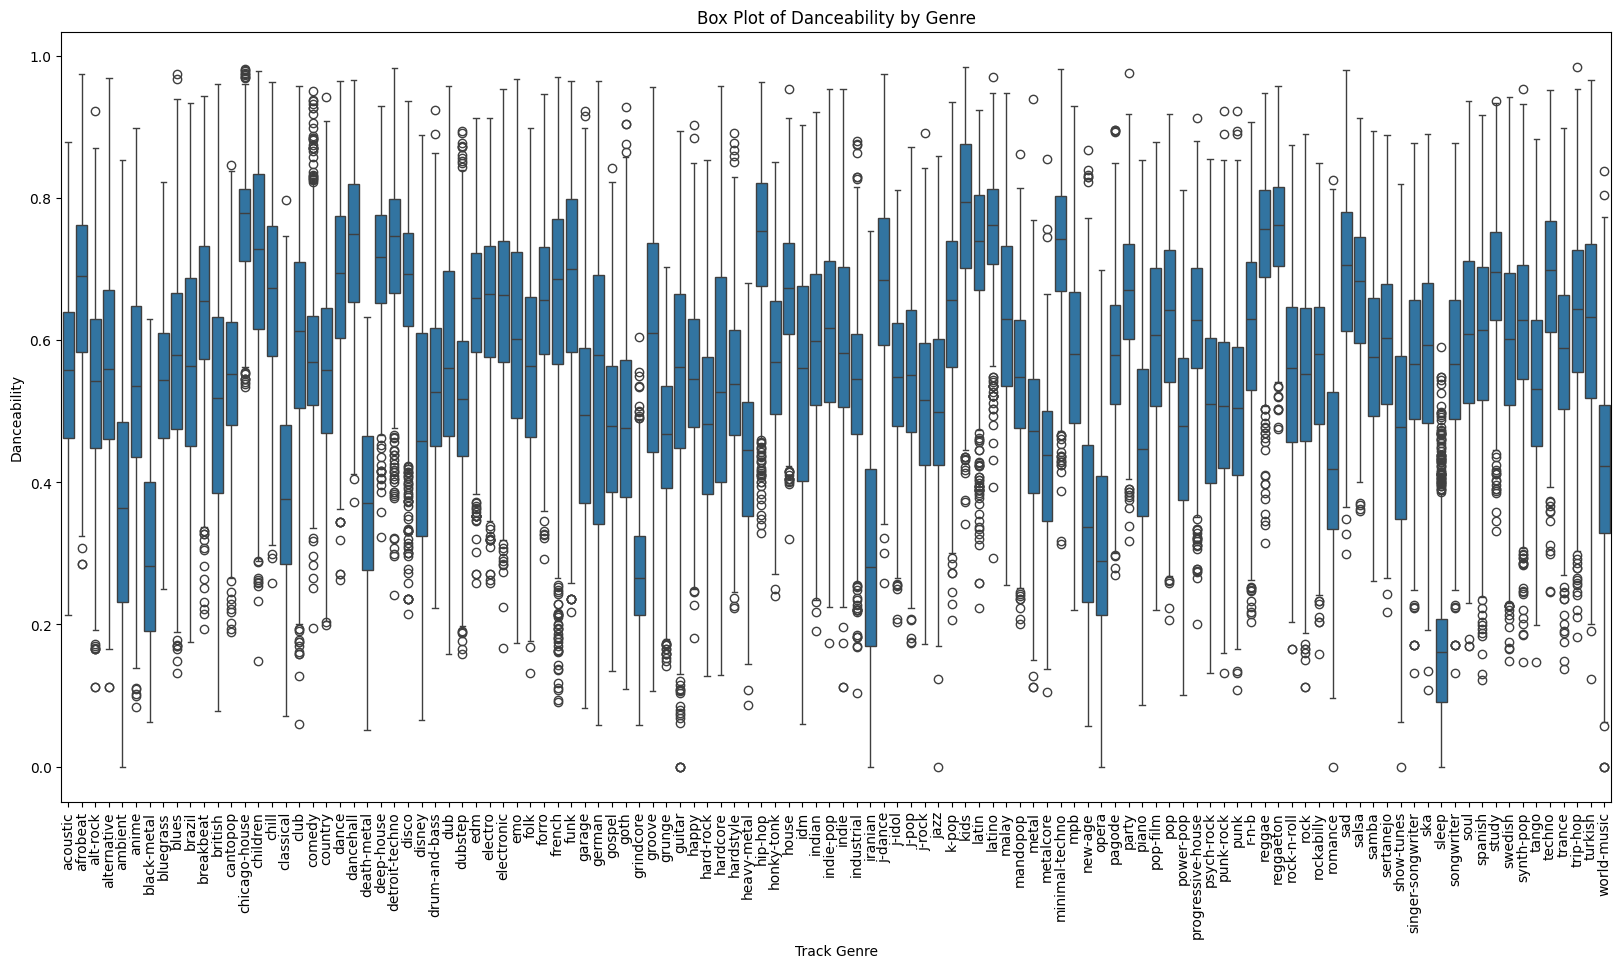

In [10]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='track_genre', y='danceability', data=df)
plt.xlabel('Track Genre')
plt.ylabel('Danceability')
plt.title('Box Plot of Danceability by Genre')
plt.xticks(rotation=90)
plt.show()


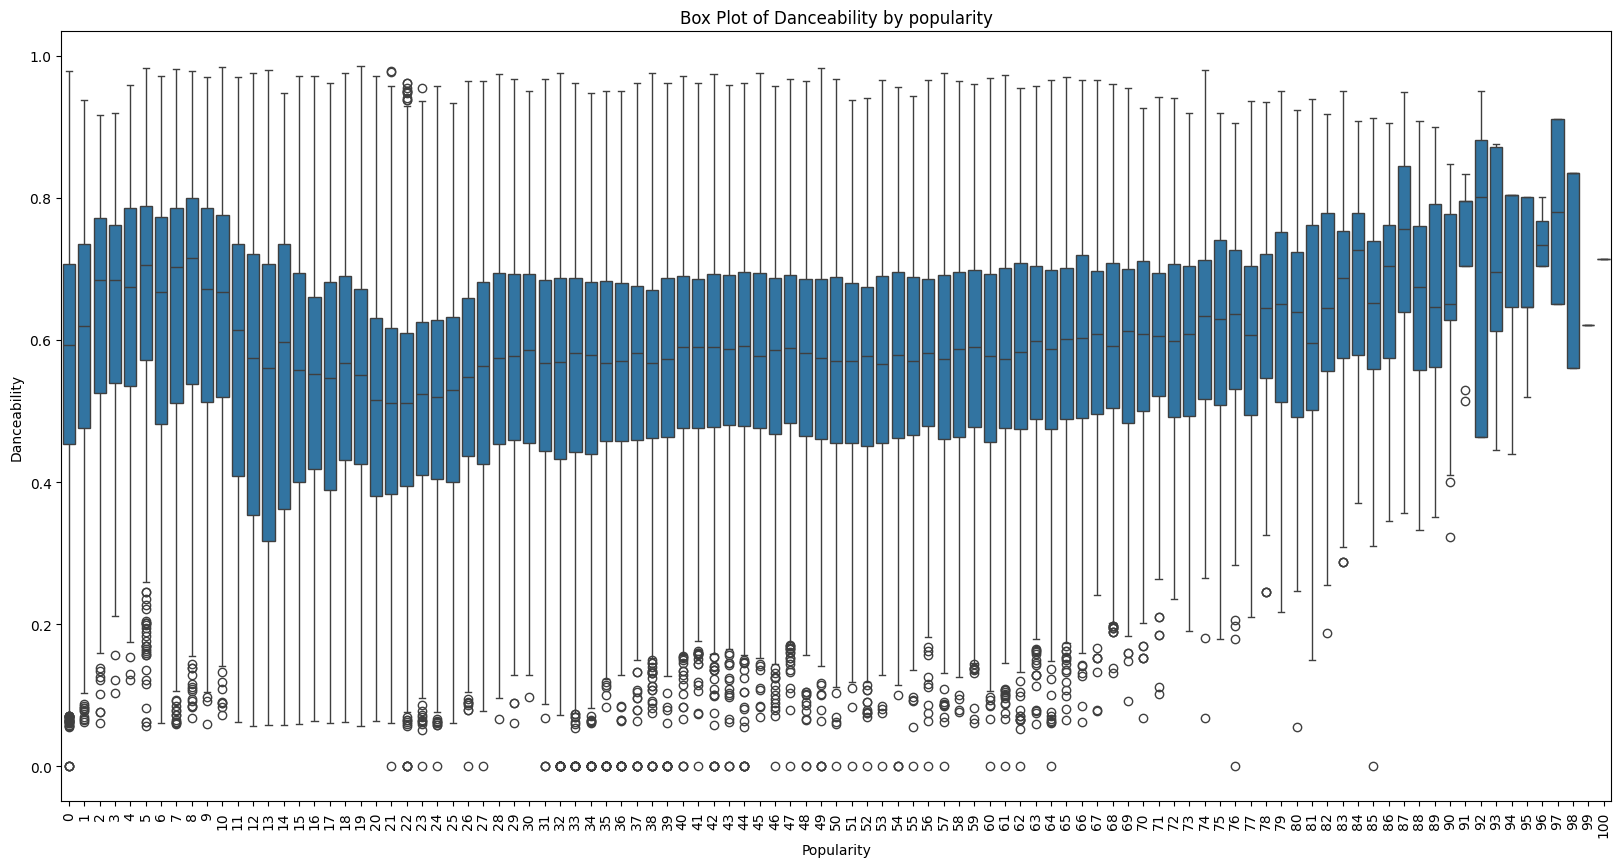

In [11]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='popularity', y='danceability', data=df)
plt.xlabel('Popularity')
plt.ylabel('Danceability')
plt.title('Box Plot of Danceability by popularity')
plt.xticks(rotation=90)
plt.show()

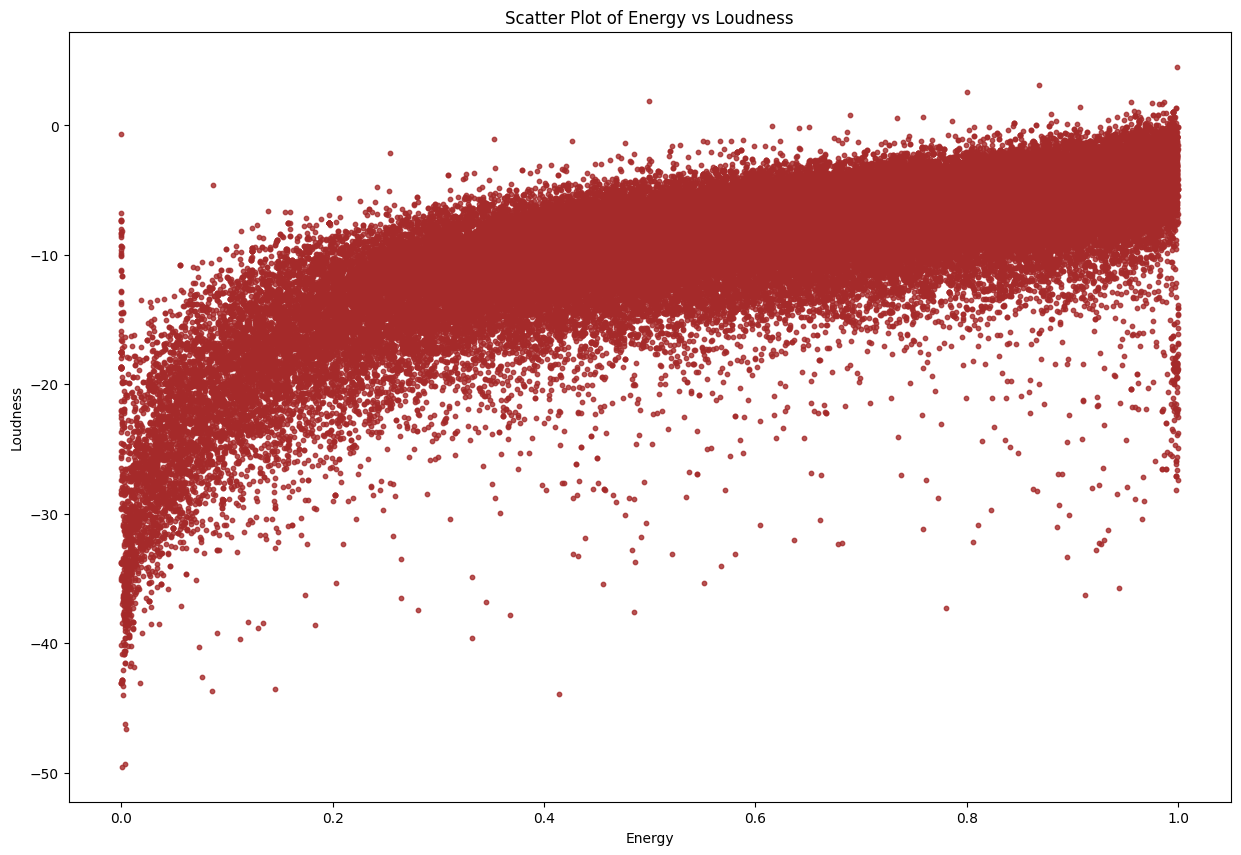

In [12]:
plt.figure(figsize=(15, 10))
plt.scatter(df['energy'], df['loudness'], s=10, c='brown', alpha=0.8)
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.title('Scatter Plot of Energy vs Loudness')
plt.show()

In [13]:
features = ['duration_ms', 'danceability', 'energy', 'loudness', 'tempo', 
            'explicit', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 
            'liveness', 'valence', 'time_signature']
target = 'popularity'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
print(feature_importance_df)


Mean Squared Error: 219.70482139371617
             Feature  Importance
0        duration_ms    0.103974
1       danceability    0.103234
2             energy    0.092952
3           loudness    0.098522
4              tempo    0.103509
5           explicit    0.007343
6               mode    0.009830
7        speechiness    0.100313
8       acousticness    0.109582
9   instrumentalness    0.073027
10          liveness    0.089356
11           valence    0.101822
12    time_signature    0.006537


In [14]:
data = df.copy()
finalData = data.drop(['Unnamed: 0','track_id','album_name','track_name'],axis=1)

In [15]:
finalData['popularity'] = pd.qcut(finalData['popularity'], q=2, labels=[0,1])

In [16]:
df_dummies = pd.get_dummies(df, columns=['track_genre'])

df_dummies = df_dummies.drop(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name'], axis=1)

y = df_dummies.loc[:, 'popularity']
X = df_dummies.drop(['popularity'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_features = ['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 
                      'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 
                      'time_signature']
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])


linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_train = linear_model.predict(X_train)
y_pred_test = linear_model.predict(X_test)

train_mae = mean_absolute_error(y_train, y_pred_train)
train_mse = mean_squared_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)

test_mae = mean_absolute_error(y_test, y_pred_test)
test_mse = mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training Set Evaluation")
print(f"Mean Absolute Error: {train_mae}")
print(f"Mean Squared Error: {train_mse}")
print(f"R-squared Score: {train_r2}")

print("\nTesting Set Evaluation")
print(f"Mean Absolute Error: {test_mae}")
print(f"Mean Squared Error: {test_mse}")
print(f"R-squared Score: {test_r2}")

Training Set Evaluation
Mean Absolute Error: 14.091327696525639
Mean Squared Error: 369.0496026713156
R-squared Score: 0.25969566658779286

Testing Set Evaluation
Mean Absolute Error: 14.085057218677296
Mean Squared Error: 365.72439781059524
R-squared Score: 0.25888842156439673


In [17]:
feature_importance = np.abs(linear_model.coef_)
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df.head(10))

                        Feature  Importance
73          track_genre_iranian   30.366509
107         track_genre_romance   29.790504
95         track_genre_pop-film   26.152350
81            track_genre_latin   25.212706
79            track_genre_k-pop   23.253237
38   track_genre_detroit-techno   22.427408
27    track_genre_chicago-house   21.395191
29            track_genre_chill   19.478402
78             track_genre_jazz   19.147867
30        track_genre_classical   19.103908


In [18]:
rf_model = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation R-squared Score: {best_score}")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation R-squared Score: 0.5025743841710495


In [20]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr_model = SVR()
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.1, 0.2, 0.5, 0.3],
}

grid_search = GridSearchCV(estimator=svr_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation R-squared Score: {best_score}")

In [55]:
def adjusted_r2_score(r2, n, k):
    return 1 - (1 - r2) * ((n - 1) / (n - k - 1))

n_train = X_train.shape[0]
k_train = X_train.shape[1]
train_adj_r2 = adjusted_r2_score(train_r2, n_train, k_train)

n_test = X_test.shape[0]
k_test = X_test.shape[1]
test_adj_r2 = adjusted_r2_score(test_r2, n_test, k_test)

print(f"Adjusted R-squared (Train): {train_adj_r2}")
print(f"Adjusted R-squared (Test): {test_adj_r2}")

Adjusted R-squared (Train): 0.2586551712086188
Adjusted R-squared (Test): 0.25470412082601923


In [56]:
rf_model = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation R-squared Score: {best_score}")

best_rf_model = grid_search.best_estimator_
y_pred_train_rf = best_rf_model.predict(X_train)
y_pred_test_rf = best_rf_model.predict(X_test)

train_mae_rf = mean_absolute_error(y_train, y_pred_train_rf)
train_mse_rf = mean_squared_error(y_train, y_pred_train_rf)
train_r2_rf = r2_score(y_train, y_pred_train_rf)

test_mae_rf = mean_absolute_error(y_test, y_pred_test_rf)
test_mse_rf = mean_squared_error(y_test, y_pred_test_rf)
test_r2_rf = r2_score(y_test, y_pred_test_rf)

print(f"Training Set Evaluation (RandomForest)")
print(f"Mean Absolute Error: {train_mae_rf}")
print(f"Mean Squared Error: {train_mse_rf}")
print(f"R-squared Score: {train_r2_rf}")

print("\nTesting Set Evaluation (RandomForest)")
print(f"Mean Absolute Error: {test_mae_rf}")
print(f"Mean Squared Error: {test_mse_rf}")
print(f"R-squared Score: {test_r2_rf}")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation R-squared Score: 0.5025743841710495
Training Set Evaluation (RandomForest)
Mean Absolute Error: 4.870023353240554
Mean Squared Error: 60.554669908542834
R-squared Score: 0.8785288367277672

Testing Set Evaluation (RandomForest)
Mean Absolute Error: 10.366483009519827
Mean Squared Error: 230.39473167331016
R-squared Score: 0.5331232909922438
